In [1]:
#!/usr/bin/env python3

from __future__ import print_function, division
import numpy as np
import pandas as pd
import re
import matplotlib
import matplotlib.pyplot as plt
# %config InlineBackend.figure_format = 'retina'
import seaborn #plotting lib, but just adding makes the matplotlob plots better
import glob # use this for file IO later

import math

from numpy import sin, cos, pi, sqrt, dot
import scipy as sp
from scipy import stats, optimize
from scipy import linalg as la
from scipy.optimize import leastsq
from scipy.optimize import least_squares
import pdb

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata, interp1d
from scipy import signal
from scipy.optimize import curve_fit
from scipy import interpolate

from scipy.interpolate import griddata, interp1d

import sys
sys.path.append("..")
                
from pprz_data.pprz_data import DATA
import matplotlib as mpl

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [3]:
def process(probe_filename):
    delta = 1.0
    probe_sample_frequency = 100.
    probe = pd.read_csv(probe_filename , delimiter='\t', skiprows=1, header=None,skipfooter=4, engine='python')
    columns= ['systime','baro_pressure','diff_pressure_central', 'diff_pressure_horizontal','diff_pressure_vertical',
              'air_velocity','alpha_angle','beta_angle',
              'accel_x','accel_y','accel_z',
              'gyro_x','gyro_y','gyro_z',
              'rtc_time','utm_east','utm_north','altitude',
              'baro_temperature','diff_temperature_central','diff_temperature_horizontal','diff_temperature_vertical',
              'attitude_x','attitude_y','attitude_z','course','speed','climb_speed','ps_5V','core_temperature','utm_zone', 'xxx']
    probe.columns = columns

    probe['time'] = np.linspace(0,len(probe)/probe_sample_frequency,len(probe))
    columns=['diff_pressure_horizontal', 'diff_pressure_vertical', 'diff_pressure_central', 'time']
    columns=['diff_pressure_horizontal', 'diff_pressure_vertical', 'diff_pressure_central', 'time','accel_x','accel_y','accel_z']
    data2 = probe[columns]
    return data2

In [4]:
df = pd.read_csv('../data/20_11_2020_Laurac/flight3/smartprobe_example.csv')

In [5]:
df.columns

Index(['diff_pressure_horizontal', 'diff_pressure_vertical',
       'diff_pressure_central', 'time', 'accel_x', 'accel_y', 'accel_z'],
      dtype='object')

In [6]:
df.head(5)

,diff_pressure_horizontal,diff_pressure_vertical,diff_pressure_central,time,accel_x,accel_y,accel_z
0,29.483334,-1.666667,276.633331,4000.006485,3.118315,-3.535049,12.492422
1,37.950001,-2.200000,278.716675,4000.016485,-1.005908,-4.646338,19.466122
2,40.583332,-2.516667,279.700012,4000.026485,1.973496,1.283731,17.416582
3,39.650002,1.150000,280.600006,4000.036485,0.843047,1.072969,19.466122
4,32.616665,3.350000,275.133331,4000.046485,1.657354,-2.471660,15.534098


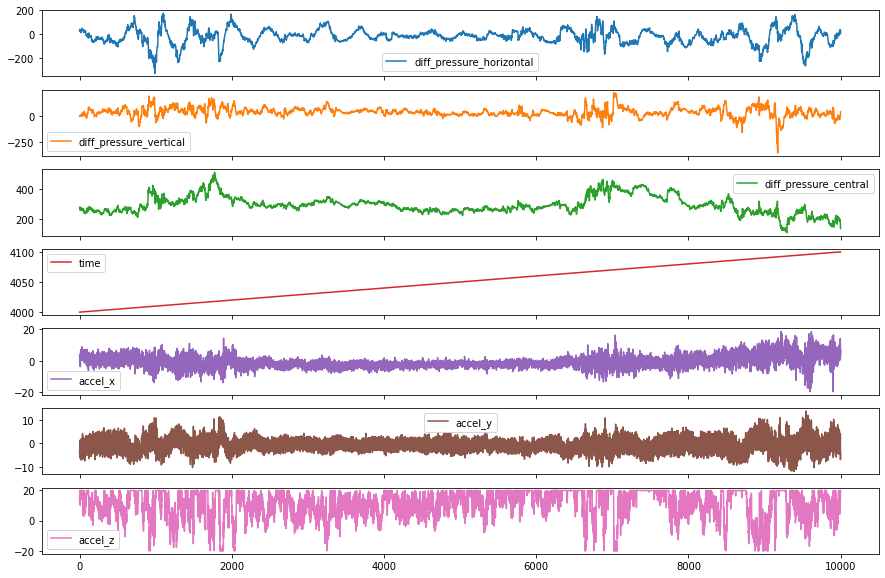

In [7]:
df.plot(subplots=True, figsize=(15,10))
plt.show()

# You can download SmartProbe log files from this link :
# http://data.recherche.enac.fr/drones/Flight_data/Dynamic_Soaring/20_11_2020_Laurac/

After downloading, you can set your filename accordingly and process with the supplied function above...

In [ ]:
# filename = '../data/20_11_2020_Laurac/flight3/smartprobe0074.tsv'
filename = 'NEW_SMARTPROBE_DATA_DIRECTORY/smartprobe00XX.tsv'
df_new_smartprobe_data = process(filename)